In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create database connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 15, 1.2),
    ("Oranges", 8, 3.0),
    ("Apples", 7, 2.5),
    ("Bananas", 12, 1.2),
    ("Oranges", 5, 3.0),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query: total quantity and total revenue per product
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load query results into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print results
print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         34     85.0
1  Bananas         54     64.8
2  Oranges         26     78.0


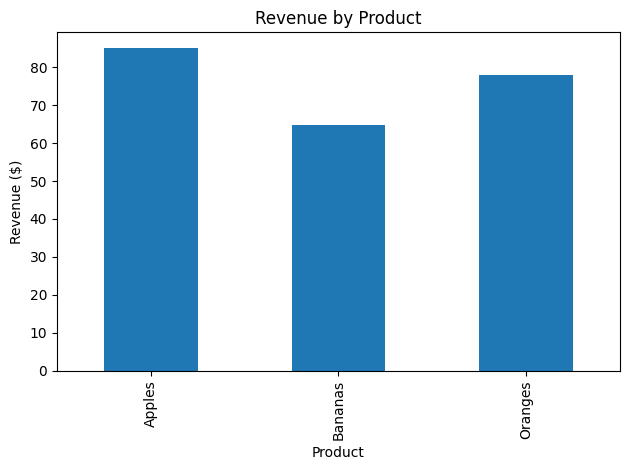

In [4]:
# Plot bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', legend=False)

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saves chart as image
plt.show()